# LSTM Multivariate Model

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer

In [2]:
X_train = pd.read_csv('X_train_scaled.csv')
y_train = pd.read_csv('y_train_scaled.csv')
X_cv = pd.read_csv('X_val_scaled.csv')
y_cv = pd.read_csv('y_val_scaled.csv')
X_train_cv = pd.read_csv('X_train_val_scaled.csv')
y_train_cv = pd.read_csv('y_train_val_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test_scaled.csv')

val =  pd.read_csv('val.csv')
y_val = pd.read_csv('y_val.csv')
test =  pd.read_csv('test.csv')
test_y = pd.read_csv('y_test.csv')

 ## Defining LSTM Model & MAPE Functions

In [3]:
def run(neurons, batchSize, numEpochs, X, Y, pred_set, orig, col_mean, col_std):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(neurons, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)
    
    predicted_price_df = pd.DataFrame(predicted_Price, columns=['Predicted Price'])
    
    # Scale Back Result
    est = predicted_price_df['Predicted Price'] * col_std + col_mean

    rmse = sqrt(mean_squared_error(orig, est))
    mape = get_mape(orig, est)
    
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

In [4]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Tuning Epochs Param

In [5]:
# vary training batches
param_label = 'epochs'
param_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# param_list = [10]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, default_batch_size, param, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
14/14 [==============================] - 1s 3ms/step - loss: 0.7139
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2870
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.1522
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 0.1258
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.1037
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0862
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 8/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0614
Epoch 9/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0524
Epoch 10/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 11/50
14/14 [============================

14/14 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 49/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 50/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 51/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 52/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 53/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 54/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 55/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 56/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 57/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 58/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 59/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 60/100
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 47/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 48/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 49/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 50/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 51/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 52/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 53/150
14/14 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 54/150
14/14 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 55/150
14/14 [==============================] - 0s 3ms/step - loss: 0.0240
Epoch 56/150
14/14 [==============================] - 0s 3ms/step - loss: 0.0557
Epoch 57/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 58/150
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 147/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 148/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 149/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 150/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0106
RMSE on train set = 2930.915
MAPE on train set = 18.815%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 0.5883
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 0.2784
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.2133
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.1823
Epoch 5/200
14/14 [==============================] - 0s 3ms/step 

14/14 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 95/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 96/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 97/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 98/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 99/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 100/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 101/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 102/200
14/14 [==============================] - 0s 4ms/step - loss: 0.0139
Epoch 103/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 104/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 105/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 106/200
14/14 [==============

14/14 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 195/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 196/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 197/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 198/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 199/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 200/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0104
RMSE on train set = 3081.474
MAPE on train set = 18.980%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/250
14/14 [==============================] - 1s 2ms/step - loss: 0.6566
Epoch 2/250
14/14 [==============================] - 0s 2ms/step - loss: 0.3139
Epoch 3/250
14/14 [==============================] - 0s 2ms/s

14/14 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 93/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 94/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 95/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 96/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 97/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 98/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 99/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 100/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 101/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 102/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 103/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 104/250
14/14 [================

14/14 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 193/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 194/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 195/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 196/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 197/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 198/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 199/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 200/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 201/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 202/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 203/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 204/250
14/14 [=========

Epoch 40/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 41/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 42/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 48/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 49/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 50/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 51/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 52/300
14/14 [========

14/14 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 141/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 142/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 143/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 144/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 145/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 146/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 147/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 148/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 149/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 150/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 151/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 152/300
14/14 [=========

14/14 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 241/300
14/14 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 242/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 243/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 244/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 245/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 246/300
14/14 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 247/300
14/14 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 248/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 249/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 250/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 251/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 252/300
14/14 [========

Epoch 38/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0566
Epoch 39/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 40/350
14/14 [==============================] - 0s 3ms/step - loss: 0.1011
Epoch 41/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 42/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 43/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 44/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 45/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 46/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 47/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 48/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 49/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 50/350
14/14 [========

14/14 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 139/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 140/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 141/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 142/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 143/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0105
Epoch 144/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 145/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 146/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 147/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 148/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 149/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 150/350
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 239/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 240/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 241/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 242/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 243/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 244/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 245/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 246/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 247/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 248/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 249/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 250/350
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 339/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 340/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 341/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 342/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 343/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 344/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 345/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 346/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 347/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 348/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 349/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 350/350
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 87/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 88/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 89/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 90/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 91/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 92/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 93/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 94/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 95/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 96/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 97/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 98/400
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 187/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 188/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 189/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 190/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 191/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 192/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 193/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 194/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 195/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 196/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 197/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 198/400
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 287/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 288/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 289/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 290/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 291/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 292/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 293/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 294/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 295/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 296/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 297/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 298/400
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 387/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 388/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 389/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 390/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 391/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 392/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 393/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 394/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 395/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 396/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 397/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 398/400
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 85/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 86/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 87/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 88/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 89/450
14/14 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 90/450
14/14 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 91/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 92/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 93/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 94/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 95/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 96/450
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 185/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 186/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 187/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 188/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 189/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 190/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 191/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 192/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 193/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 194/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 195/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 196/450
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 285/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 286/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 287/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 288/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 289/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 290/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 291/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 292/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 293/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 294/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 295/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 296/450
14/14 [=========

14/14 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 385/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 386/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 387/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 388/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 389/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 390/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 391/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 392/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 393/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 394/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 395/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 396/450
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 32/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 33/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 34/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 35/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 36/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 37/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 38/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 39/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 40/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 41/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 42/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 43/500
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 132/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 133/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 134/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 135/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 136/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 137/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 138/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 139/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 140/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 141/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 142/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 143/500
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 232/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 233/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 234/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 235/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 236/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 237/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 238/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 239/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 240/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 241/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 242/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 243/500
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 332/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 333/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 334/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 335/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 336/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 337/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 338/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 339/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 340/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 341/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 342/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 343/500
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 432/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 433/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 434/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 435/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 436/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 437/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 438/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 439/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 440/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 441/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 442/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 443/500
14/14 [=========

,epochs,rmse,mape
0,50,2902.399039,18.749635
1,100,3069.880377,18.982712
2,150,2930.915482,18.814549
3,200,3081.473615,18.980186
4,250,2948.776152,18.974573
5,300,2873.238625,18.706259
6,350,3049.304678,19.002230
7,400,2907.746924,18.985065
8,450,3014.474721,19.014142
9,500,3237.662397,19.204672


In [6]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 2873.239
optimum params = 300


In [7]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 18.706%
optimum params = 300


## Tuning Batch Size Parameter

In [8]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, param, epoch_opt, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/300
14/14 [==============================] - 1s 2ms/step - loss: 0.7346
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 0.3416
Epoch 3/300
14/14 [==============================] - 0s 4ms/step - loss: 0.2006
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 0.1439
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 6/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0950
Epoch 7/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0781
Epoch 8/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 9/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 10/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 11/300
14/14 [=================

14/14 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 101/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 102/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 103/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 104/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 105/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 106/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 107/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 108/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 109/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 110/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 111/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 112/300
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 201/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 202/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 203/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 204/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 205/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 206/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 207/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 208/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 209/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 210/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 211/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 212/300
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0071
RMSE on train set = 2977.838
MAPE on train set = 18.889%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/300
7/7 [==============================] - 1s 2ms/step - loss: 0.7478
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 0.4956
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 0.3295
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 0.2356
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1926
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1719
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1570
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1436
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1323
Epoch 10/30

7/7 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 102/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 103/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 104/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 105/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 106/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 107/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 108/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 109/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 110/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 111/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 112/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 113/300
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 204/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 205/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 206/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 207/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 208/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 209/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 210/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 211/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 212/300
7/7 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 213/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 214/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 215/300
7/7 [==============================] - 0

4/4 [==============================] - 1s 2ms/step - loss: 0.9452
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7325
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5657
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4290
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3305
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2728
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2421
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2157
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1880
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1380
Epoch 13/300
4/4 [==============================] - 0s 27ms/step - loss: 

4/4 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 105/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 106/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 107/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 108/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 109/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 110/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 111/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 112/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 113/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 114/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 115/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 116/300
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 207/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 208/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 209/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 210/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 211/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 212/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 213/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 214/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 215/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 216/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 217/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 218/300
4/4 [==============================] - 0

Epoch 6/300
2/2 [==============================] - 0s 4ms/step - loss: 0.3531
Epoch 7/300
2/2 [==============================] - 0s 4ms/step - loss: 0.3074
Epoch 8/300
2/2 [==============================] - 0s 4ms/step - loss: 0.2728
Epoch 9/300
2/2 [==============================] - 0s 4ms/step - loss: 0.2470
Epoch 10/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2270
Epoch 11/300
2/2 [==============================] - 0s 4ms/step - loss: 0.2097
Epoch 12/300
2/2 [==============================] - 0s 5ms/step - loss: 0.1935
Epoch 13/300
2/2 [==============================] - 0s 4ms/step - loss: 0.1780
Epoch 14/300
2/2 [==============================] - 0s 4ms/step - loss: 0.1635
Epoch 15/300
2/2 [==============================] - 0s 4ms/step - loss: 0.1507
Epoch 16/300
2/2 [==============================] - 0s 4ms/step - loss: 0.1399
Epoch 17/300
2/2 [==============================] - 0s 4ms/step - loss: 0.1310
Epoch 18/300
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 110/300
2/2 [==============================] - 0s 7ms/step - loss: 0.0096
Epoch 111/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 112/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 113/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 114/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 115/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 116/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 117/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 118/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 119/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 120/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 121/300
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 212/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 213/300
2/2 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 214/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 215/300
2/2 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 216/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 217/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 218/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 219/300
2/2 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 220/300
2/2 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 221/300
2/2 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 222/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 223/300
2/2 [==============================] - 

,batch_size,rmse,mape
0,32,2977.837791,18.888653
1,64,2888.699237,18.734021
2,128,3192.482781,19.011231
3,256,3018.043603,18.986264


In [9]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 2888.699
optimum params = 64


In [10]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 18.734%
optimum params = 64


In [11]:
# vary neurons
param_label = 'neurons'
param_list = [10, 20, 30, 40, 50]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(param, default_batch_size, epoch_opt, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/300
14/14 [==============================] - 1s 5ms/step - loss: 1.2163
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.7796
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 0.5025
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 0.3569
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2918
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2498
Epoch 7/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 8/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2058
Epoch 9/300
14/14 [==============================] - 0s 3ms/step - loss: 0.1892
Epoch 10/300
14/14 [==============================] - 0s 3ms/step - loss: 0.1742
Epoch 11/300
14/14 [=================

14/14 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 101/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 102/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 103/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 104/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 105/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 106/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 107/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 108/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 109/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 110/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 111/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 112/300
14/14 [=========

14/14 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 201/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 202/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 203/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 204/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 205/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 206/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 207/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 208/300
14/14 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 209/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 210/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 211/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 212/300
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0067
RMSE on train set = 3172.127
MAPE on train set = 19.296%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/300
14/14 [==============================] - 1s 2ms/step - loss: 0.4056
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2033
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 0.1305
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 0.1113
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0923
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0792
Epoch 7/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 8/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 9/300
14/14 [==============================] - 0s 3ms/step - loss: 

14/14 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 99/300
14/14 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 100/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 101/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 102/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 103/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 104/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 105/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 106/300
14/14 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 107/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 108/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 109/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 110/300
14/14 [==========

14/14 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 199/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 200/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 201/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 202/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 203/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 204/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 205/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 206/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 207/300
14/14 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 208/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 209/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 210/300
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 299/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 300/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0051
RMSE on train set = 2815.497
MAPE on train set = 18.703%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/300
14/14 [==============================] - 1s 2ms/step - loss: 0.6621
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.3121
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 0.1902
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 0.1491
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 0.1284
Epoch 6/300
14/14 [==============================] - 0s 2ms/step - loss: 0.1149
Epoch 7/300
14/14 [==============================] - 0s 2ms/step - lo

14/14 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 97/300
14/14 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 98/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 99/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 100/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 101/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 102/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 103/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 104/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 105/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 106/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 107/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 108/300
14/14 [============

14/14 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 197/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 198/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 199/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 200/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 201/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 202/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 203/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 204/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 205/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 206/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 207/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 208/300
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 297/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 298/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 299/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 300/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0029
RMSE on train set = 3166.503
MAPE on train set = 19.020%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/300
14/14 [==============================] - 1s 2ms/step - loss: 0.5908
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2293
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 0.1527
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 0.1164
Epoch 5/300
14/14 [==============================] - 0s 2ms/step 

14/14 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 95/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 96/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 97/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 98/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 99/300
14/14 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 100/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 101/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 102/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 103/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 104/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0282
Epoch 105/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 106/300
14/14 [==============

14/14 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 195/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 196/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 197/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 198/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 199/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 200/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 201/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 202/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 203/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 204/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 205/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 206/300
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 295/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 296/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 297/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 298/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 299/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 300/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0040
RMSE on train set = 3087.776
MAPE on train set = 19.008%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/300
14/14 [==============================] - 1s 2ms/step - loss: 0.6226
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 0.2457
Epoch 3/300
14/14 [==============================] - 0s 2ms/s

14/14 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 93/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 94/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 95/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 96/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 97/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 98/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 99/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 100/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 101/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 102/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 103/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 104/300
14/14 [================

14/14 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 193/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 194/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 195/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 196/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 197/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 198/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 199/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 200/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 201/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 202/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 203/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 204/300
14/14 [=========

14/14 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 293/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 294/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 295/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 296/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 297/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 298/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 299/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 300/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0066
RMSE on train set = 2951.216
MAPE on train set = 18.827%


,neurons,rmse,mape
0,10,3172.127296,19.295525
1,20,2815.497271,18.703339
2,30,3166.502951,19.019933
3,40,3087.776311,19.007803
4,50,2951.216020,18.826866


In [12]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
neurons_opt = temp['neurons'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(neurons_opt))

min RMSE = 2815.497
optimum params = 20


In [13]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['neurons'].values[0]))

min MAPE = 18.703%
optimum params = 20


## Model with Optimal Parameters

In [14]:
# Process the data for LSTM
testX =np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX =np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [15]:
# Building the LSTM Model

start = time.time()


lstm = Sequential()
lstm.add(LSTM(neurons_opt, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)
# LSTM Prediction
y_pred = lstm.predict(X_test)

predicted_price_df = pd.DataFrame(y_pred, columns=['Predicted Price'])
    
# Scale Back Result
est = predicted_price_df['Predicted Price'] * test['Close_std'] + test['Close_mean']

end = time.time()
time_elapsed = end - start
print("Time Elapsed = ", time_elapsed)


rmse = sqrt(mean_squared_error(test_y, est))
mape = get_mape(test_y, est)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/300
10/10 [==============================] - 1s 2ms/step - loss: 0.7194
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4510
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 0.3036
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 0.2317
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1812
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 0.1417
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1189
Epoch 8/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1051
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 10/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0833
Epoch 11/300
10/10 [=================

10/10 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 101/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 102/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 103/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 104/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 105/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 106/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 107/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 108/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 109/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 110/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 111/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 112/300
10/10 [=========

10/10 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 201/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 202/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 203/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 204/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 205/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 206/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 207/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 208/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 209/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 210/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 211/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 212/300
10/10 [=========

10/10 [==============================] - 0s 3ms/step - loss: 0.0065
Time Elapsed =  10.731655836105347
RMSE on test set = 3739.418
MAPE on test set = 23.424%


In [16]:
# Calculating RMSE & MAPE for each round of shifting for 5 days
for i in range(5):
    est = est[i+1:]
    test_y = test_y[:-(i+1)]
    
    rmse = sqrt(mean_squared_error(test_y, est))
    mape = get_mape(test_y, est)

    # Calculate RMSE
    print("RMSE on test set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on test set = %0.3f%%" % mape)
    print("\n")

RMSE on test set = 3370.483
MAPE on test set = 23.418%


RMSE on test set = 2881.466
MAPE on test set = 23.448%


RMSE on test set = 3263.490
MAPE on test set = 23.255%


RMSE on test set = 4127.002
MAPE on test set = 22.656%


RMSE on test set = 4768.444
MAPE on test set = 21.778%




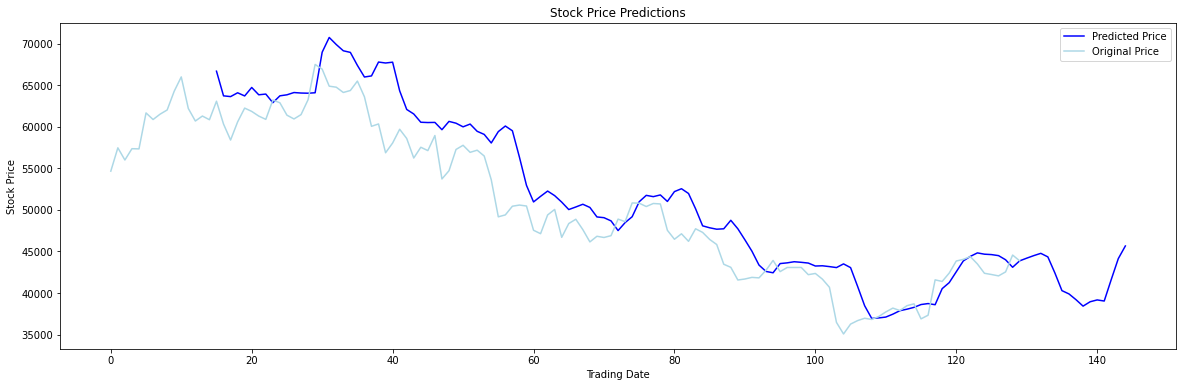

In [17]:
plt.plot(est, color = 'blue', label = 'Predicted Price')
plt.plot(test_y, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

## Prediction

In [18]:
predict_feature = pd.read_csv('predict_feature.csv')

In [19]:
# Process the data for LSTM
testX =np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])
predict_feature

array([[[-0.79500295,  0.99478636,  2.69379289, -0.91053679,
          0.30621419,  0.71920306, -0.32882933, -0.16651058,
         -1.43744719, -0.72267876,  0.94996311,  2.80817493,
         -0.91092801,  0.37921589,  0.64249732, -0.52598084,
         -0.24997117, -1.61802785, -0.75104984,  0.88965262,
          3.2483529 , -0.98726414,  0.59240154,  0.57416853,
         -0.66192609, -0.33907478, -1.78608512, -0.86170985,
          0.8319429 ,  2.8508659 , -0.91046227,  0.56229217,
          0.52108076, -0.81476911, -0.49192647, -1.90525532,
         -0.77804137,  0.84418974,  2.78690145, -1.02213244,
          0.67478063,  0.56252312, -0.65679442, -0.36023371,
         -1.62136398]]])

In [20]:
predicted_price = lstm.predict(predict_feature)

predicted_price_df = pd.DataFrame(predicted_price, columns=['Predicted Price'])
    
# Scale Back Result
close_mean = test['Close_mean'][-5:].mean()
close_std = test['Close_std'][-5:].mean()
est = predicted_price_df['Predicted Price'] * close_std + close_mean

In [21]:
est

0    41766.164062
Name: Predicted Price, dtype: float32

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 41588.84 on 4 Mar 2022.